#unzip data

In [1]:
!unzip /content/drive/MyDrive/Colab_Notebooks/2023_AIfactory_위성segmentation_202307/정유탱크/oiltank_dataset.zip

Archive:  /content/drive/MyDrive/Colab_Notebooks/2023_AIfactory_위성segmentation_202307/정유탱크/oiltank_dataset.zip
   creating: oiltank_dataset/
   creating: oiltank_dataset/valid_images/
  inflating: oiltank_dataset/valid_images/OBJ05625_PS4_K3A_NIA0358.tif  
  inflating: oiltank_dataset/valid_images/OBJ05308_PS3_K3A_NIA0344.kml  
  inflating: oiltank_dataset/valid_images/OBJ03913_PS3_K3A_NIA0165.png  
  inflating: oiltank_dataset/valid_images/OBJ05658_PS3_K3A_NIA0359.kml  
  inflating: oiltank_dataset/valid_images/OBJ05155_PS4_K3A_NIA0336.tif  
  inflating: oiltank_dataset/valid_images/OBJ03972_PS4_K3A_NIA0166.tif  
  inflating: oiltank_dataset/valid_images/OBJ04926_PS3_K3A_NIA0172.png  
  inflating: oiltank_dataset/valid_images/OBJ05436_PS3_K3A_NIA0165.kml  
  inflating: oiltank_dataset/valid_images/OBJ05692_PS4_K3A_NIA0361.tif  
  inflating: oiltank_dataset/valid_images/OBJ05004_PS4_K3A_NIA0328.tif  
  inflating: oiltank_dataset/valid_images/OBJ03156_PS3_K3_NIA0128.png  
  inf

#pip install

#main code

In [2]:
import os
import json
import numpy as np
import pandas as pd
import torch
import torch.nn as nn

train_images_dir = "/content/oiltank_dataset/train_images/"
train_masks_dir = "/content/oiltank_dataset/train_labels/"
vali_images_dir = "/content/oiltank_dataset/valid_images/"


train_images_path = os.listdir(train_images_dir)
train_images_path = [file for file in train_images_path if file.endswith('.png')]
train_images_path = sorted(train_images_path)

train_masks_path = os.listdir(train_masks_dir)
train_masks_path = [file for file in train_masks_path if file.endswith('.json')]
train_masks_path = sorted(train_masks_path)

vali_images_path = os.listdir(vali_images_dir)
vali_images_path = [file for file in vali_images_path if file.endswith('.png')]


assert len(train_images_path)==len(train_masks_path), "train_image and train mask must have same length"

print(f"train data length: {len(train_images_path)}")
print(f"vali data length: {len(vali_images_path)}")

train data length: 70
vali data length: 68


In [46]:
from PIL import Image

#train_####_list에 좌표 및 이미지 저장. 이미지는 Image.open() 으로 읽음.
train_image_list = []
train_label_list = []

for cur_mask, cur_image in zip(train_masks_path,train_images_path): #위 코드에서 sorted로 정렬해서 순서 같음.

  train_json_path = os.path.join(train_masks_dir,cur_mask)
  train_image_path = os.path.join(train_images_dir,cur_image)

  #### json에서 좌표 뽑아오기 ####
  with open(train_json_path,'r') as cur_json:
    temp_json = json.load(cur_json)

  temp_list = []
  for prop in temp_json['features']:
    prop = prop['properties']
    temp_list.append((prop['object_imcoords'],prop['image_id'])) #image_id는 혹시 모를 데이터 오류 체크를 위함.

  train_label_list.append(temp_list)
  ################################


  ### image 불러와두기 ####

  temp_image = Image.open(train_image_path)
  train_image_list.append((temp_image,cur_image)) #cur_image로 추후 데이터 오류 체크

  #########################

assert len(train_image_list)==len(train_label_list), "invalid data length"

#temp['features']
""" temp_json['features']에는 다음 형식이 list로 저장되어 있음.
{'properties': {'object_imcoords': '336.6415449432134,339.1612715196364,349.42843018911503,339.16127151963644,349.42843018911503,351.6538372840284,336.6415449432134,351.6538372840283',
   'object_angle': 6.283185307179586,
   'image_id': 'OBJ02634_PS3_K3_NIA0126.png',
   'ingest_time': '2020-11-04T06:52:37.773640Z',
   'type_name': 'oil tank'}},
"""

" temp_json['features']에는 다음 형식이 list로 저장되어 있음.\n{'properties': {'object_imcoords': '336.6415449432134,339.1612715196364,349.42843018911503,339.16127151963644,349.42843018911503,351.6538372840284,336.6415449432134,351.6538372840283',\n   'object_angle': 6.283185307179586,\n   'image_id': 'OBJ02634_PS3_K3_NIA0126.png',\n   'ingest_time': '2020-11-04T06:52:37.773640Z',\n   'type_name': 'oil tank'}},\n"

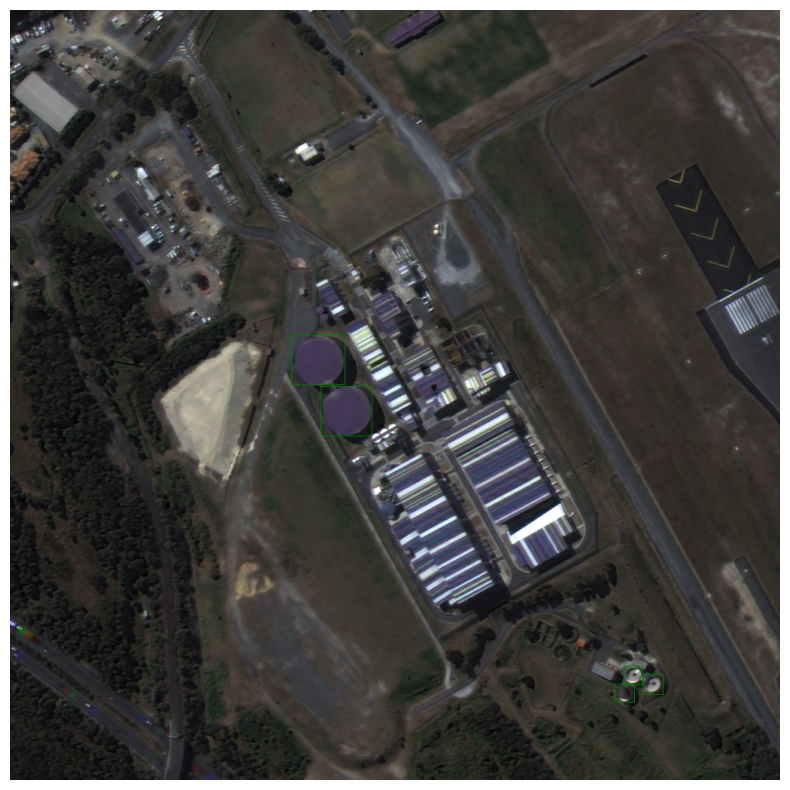

In [48]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

user_index = 1

visual_image = train_image_list[user_index]
visual_label = train_label_list[user_index]

plt.figure(figsize=(10, 10))  # 그림 크기 조정
plt.axis('off')

draw = ImageDraw.Draw(visual_image[0])

for point in visual_label:

  label_list = point[0].split(',')
  points = [(float(label_list[i]), float(label_list[i+1])) for i in range(0, len(label_list), 2)]

  assert visual_image[1] == point[1], "index not match between json and image"

  draw.polygon(points, outline='green', fill=None ) #이거 이미지 자체에 그려지는거라 visual_image[0]에 저장됨.

plt.imshow(visual_image[0])

In [52]:
#save

import matplotlib.pyplot as plt
from PIL import Image, ImageDraw


for user_index in range(len(train_image_list)):

  visual_image = train_image_list[user_index]
  visual_label = train_label_list[user_index]

  draw = ImageDraw.Draw(visual_image[0])

  for point in visual_label:

    label_list = point[0].split(',')
    points = [(float(label_list[i]), float(label_list[i+1])) for i in range(0, len(label_list), 2)]

    assert visual_image[1] == point[1], "index not match between json and image"

    draw.polygon(points, outline='green', fill=None ) #이거 이미지 자체에 그려지는거라 visual_image[0]에 저장됨.

  visual_image[0].save(f'/content/oiltank_train_img+label/oiltank_train_img+label_{user_index}.png')

In [62]:
import pandas as pd

new_train_csv = { 'index':[],
                  'train_data_loc':[],
                 'train_label_xy':[]
                  }

for user_index in range(len(train_image_list)):

  visual_image = train_image_list[user_index]
  visual_label = train_label_list[user_index]

  for point in visual_label:

    label_list = point[0].split(',')
    points = [(float(label_list[i]), float(label_list[i+1])) for i in range(0, len(label_list), 2)]

    new_train_csv['index'].append(user_index)
    new_train_csv['train_data_loc'].append(point[1])
    new_train_csv['train_label_xy'].append(points)

saving = pd.DataFrame(new_train_csv)
saving.to_csv('train_data.csv')
saving

,index,train_data_loc,train_label_xy
0,0,OBJ02634_PS3_K3_NIA0126.png,"[(336.6415449432134, 339.1612715196364), (349...."
1,0,OBJ02634_PS3_K3_NIA0126.png,"[(322.5874084582725, 352.4346226443028), (337...."
2,0,OBJ02634_PS3_K3_NIA0126.png,"[(312.82759145484135, 367.2695444895181), (329..."
3,0,OBJ02634_PS3_K3_NIA0126.png,"[(287.8424599260575, 390.3027126176158), (301...."
4,0,OBJ02634_PS3_K3_NIA0126.png,"[(305.41013053223367, 394.59703209912556), (32..."
...,...,...,...
1005,67,OBJ05733_PS3_K3A_NIA0363.png,"[(946.3780053972047, 128.88179847646327), (959..."
1006,68,OBJ05760_PS3_K3A_NIA0365.png,"[(578.1284550609116, 225.30518552949212), (593..."
1007,69,OBJ05781_PS3_K3A_NIA0368.png,"[(86.25686800677065, 264.84640029489117), (98...."
1008,69,OBJ05781_PS3_K3A_NIA0368.png,"[(109.66569892916438, 271.8905213728775), (121..."
